In [16]:
import pandas as pd
from google.colab import files
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()


df = pd.read_excel("final movies.xlsx")
df.head()


Saving final movies.xlsx to final movies (2).xlsx


,No,movie_name,year,bt_score,dubious,imdbid,tmdbId,genres,popularity,production_companies,...,Unnamed: 1279,Unnamed: 1280,Unnamed: 1281,Unnamed: 1282,Unnamed: 1283,Unnamed: 1284,Unnamed: 1285,Unnamed: 1286,Unnamed: 1287,Unnamed: 1288
0,1,Gretchen the Greenhorn,1916,3,0,6745,126925,[],1942,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Snow White,1916,3,0,7361,174598,"[Fantasy, Drama]",0.817,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,The Poor Little Rich Girl,1917,3,0,8443,95866,"[Romance, Comedy, Drama, Fantasy]",2023,['Artcraft Pictures Corporation'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Stella Maris,1918,3,0,9652,70753,[Drama],1931-01-01 00:00:00,['Mary Pickford Company'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,I Don't Want to Be a Man,1918,3,1,10281,48263,"[Comedy, Romance]",2244,['Projektions-AG Union (PAGU)'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:

df['year'] = pd.to_numeric(df['year'], errors='coerce')

df_clean = df.dropna(subset=['year'])

df_clean.loc[:, 'year'] = df_clean['year'].astype(int)

year_counts = df_clean['year'].value_counts().sort_index()


# Yeni Bölüm

In [3]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_clean = df.dropna(subset=['year']).copy()
df_clean.loc[:, 'year'] = df_clean['year'].astype(int)

df_limited = df_clean[(df_clean['year'] >= 1700) & (df_clean['year'] <= 2025)]
#since the movies were produced between 1800 through today i made a time limit
#otherwise the graphs started with year 0 until 2020, which made it hard to understand visually.

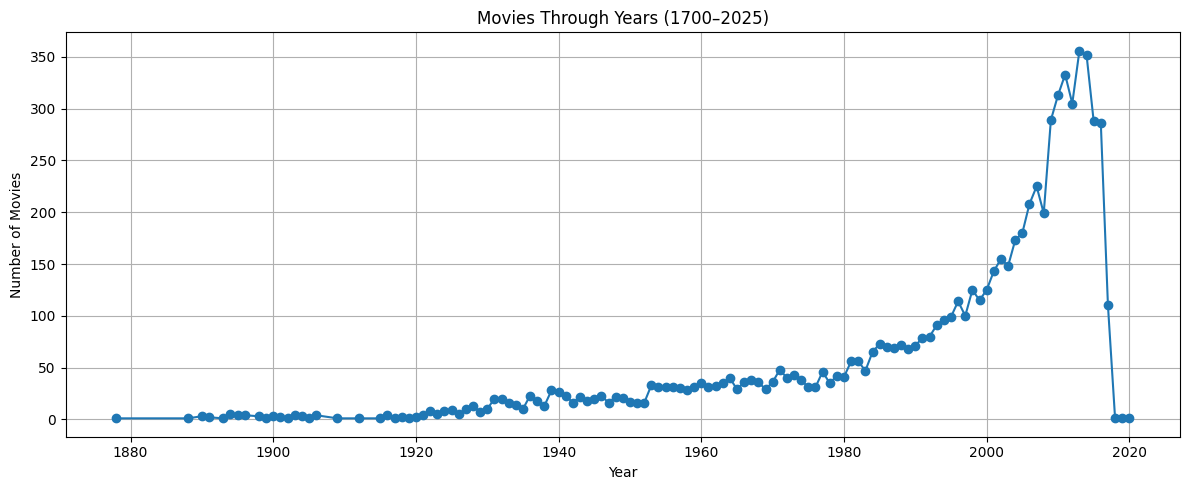

In [8]:
year_counts = df_limited['year'].value_counts().sort_index()

year_distribution_df = year_counts.reset_index()
year_distribution_df.columns = ['Year', 'Number of Movies']

year_distribution_df.head()

plt.figure(figsize=(12, 5))
plt.plot(year_distribution_df['Year'], year_distribution_df['Number of Movies'], marker='o')
plt.title("Movies Through Years (1700–2025)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-9-3849c475e244>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limited['production_countries'] = df_limited['production_countries'].astype(str).str.replace(r"[\[\]]", "", regex=True)


production_countries
'United States of America'                      3850
'United Kingdom'                                 362
'United Kingdom', 'United States of America'     254
'France'                                         230
'Japan'                                          217
'Canada', 'United States of America'              99
'Canada'                                          91
'Germany'                                         78
'Germany', 'United States of America'             78
                                                  63
'Spain'                                           60
'Italy'                                           59
'France', 'Italy'                                 58
'Australia'                                       46
'India'                                           46
'France', 'United States of America'              43
'Sweden'                                          34
'Hong Kong'                                       32
'South Korea'            

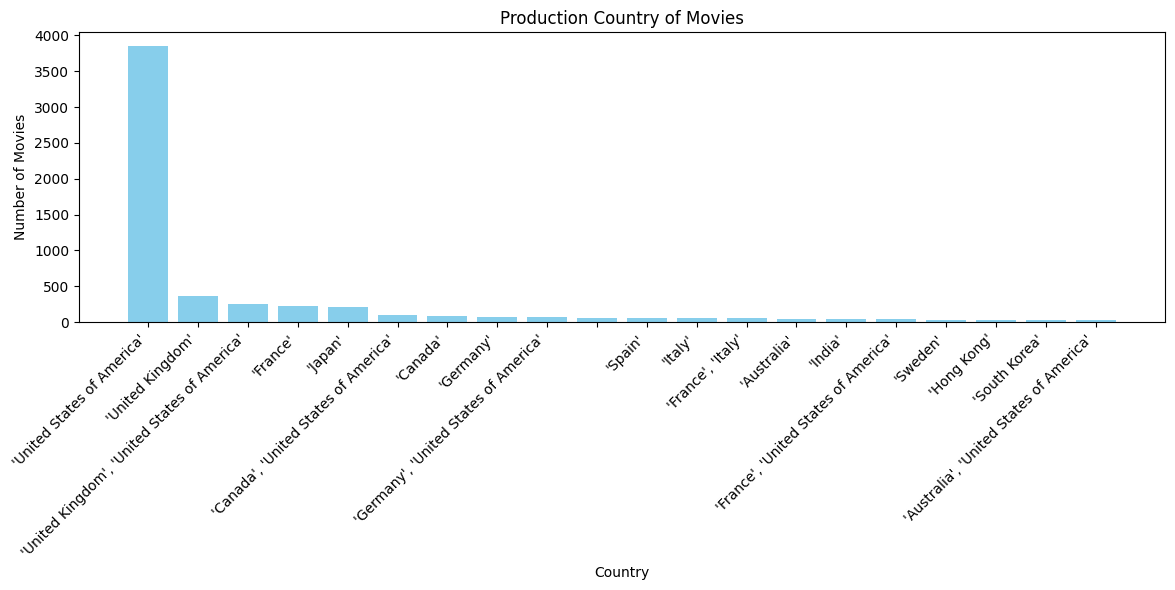

In [9]:
if 'production_countries' in df_limited.columns:

    df_limited['production_countries'] = df_limited['production_countries'].astype(str).str.replace(r"[\[\]]", "", regex=True)

    country_counts = df_limited['production_countries'].value_counts().head(20)  # İsteğe bağlı: ilk 20 ülkeyi al

    print(country_counts)

    plt.figure(figsize=(12, 6))
    plt.bar(country_counts.index, country_counts.values, color='skyblue')
    plt.title("Production Country of Movies")
    plt.xlabel("Country")
    plt.ylabel("Number of Movies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [10]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['bt_score'] = pd.to_numeric(df['bt_score'], errors='coerce')
df_clean = df.dropna(subset=['year', 'bt_score', 'production_countries']).copy()
df_clean.loc[:, 'year'] = df_clean['year'].astype(int)


<ipython-input-17-11d5489152d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.loc[:, '5yr_period'] = (df_us['year'] // 5) * 5


5yr_period
1890.0    0.000000
1895.0    0.111111
1900.0    0.000000
1905.0    0.000000
1920.0    2.000000
Name: bt_score, dtype: float64


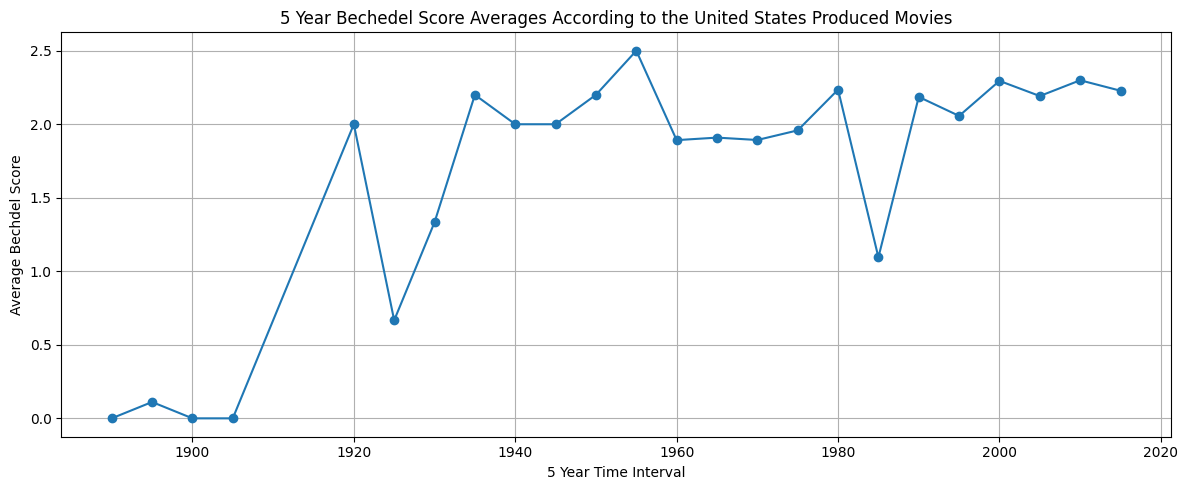

In [17]:
#since USA was the number one
df_us.loc[:, '5yr_period'] = (df_us['year'] // 5) * 5

bt_by_5yr = df_us.groupby('5yr_period')['bt_score'].mean().sort_index()

print(bt_by_5yr.head())

plt.figure(figsize=(12, 5))
plt.plot(bt_by_5yr.index, bt_by_5yr.values, marker='o')
plt.title("5 Year Bechedel Score Averages According to the United States Produced Movies")
plt.xlabel("5 Year Time Interval")
plt.ylabel("Average Bechdel Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
#in this part i wanted to know if there is a acceleration of the bt_score during certain times in the USA of the bt_score.
df_us = df_clean[df_clean['production_countries'].astype(str).str.contains("United States")]

def compute_increase_ratio(df, start_year, end_year):
    period_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    early_avg = period_df[period_df['year'] <= start_year + 5]['bt_score'].mean()
    late_avg = period_df[period_df['year'] >= end_year - 5]['bt_score'].mean()

    if early_avg > 0:
        ratio = (late_avg - early_avg) / early_avg
    else:
        ratio = float('nan')  # to avoid division by zero

    return early_avg, late_avg, ratio

p1_start, p1_end, p1_ratio = compute_increase_ratio(df_us, 1915, 1945)
p2_start, p2_end, p2_ratio = compute_increase_ratio(df_us, 1945, 1975)
p3_start, p3_end, p3_ratio = compute_increase_ratio(df_us, 1975, 2005)


print("📈 1915–1945 Bechdel Score Change:")
print(f"  Early Avg: {p1_start:.2f}, Late Avg: {p1_end:.2f}, Growth: {p1_ratio:.2%}")

print("\n📈 1945–1975 Bechdel Score Change:")
print(f"  Early Avg: {p2_start:.2f}, Late Avg: {p2_end:.2f}, Growth: {p2_ratio:.2%}")

print("\n📈 1975–2005 Bechdel Score Change:")
print(f"  Early Avg: {p3_start:.2f}, Late Avg: {p3_end:.2f}, Growth: {p3_ratio:.2%}")

📈 1915–1945 Bechdel Score Change:
  Early Avg: 1.57, Late Avg: 2.08, Growth: 32.26%

📈 1945–1975 Bechdel Score Change:
  Early Avg: 1.88, Late Avg: 1.90, Growth: 0.94%

📈 1975–2005 Bechdel Score Change:
  Early Avg: 1.88, Late Avg: 2.19, Growth: 17.03%


In [12]:
#in this part i wanted to know if there is a acceleration of the bt_score during certain times in the UK of the bt_score.
df_us = df_clean[df_clean['production_countries'].astype(str).str.contains("United Kingdom")]

def compute_increase_ratio(df, start_year, end_year):
    period_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    early_avg = period_df[period_df['year'] <= start_year + 5]['bt_score'].mean()
    late_avg = period_df[period_df['year'] >= end_year - 5]['bt_score'].mean()

    if early_avg > 0:
        ratio = (late_avg - early_avg) / early_avg
    else:
        ratio = float('nan')  # to avoid division by zero

    return early_avg, late_avg, ratio

p1_start, p1_end, p1_ratio = compute_increase_ratio(df_us, 1915, 1945)
p2_start, p2_end, p2_ratio = compute_increase_ratio(df_us, 1945, 1975)
p3_start, p3_end, p3_ratio = compute_increase_ratio(df_us, 1975, 2005)


print("📈 1915–1945 Bechdel Score Change:")
print(f"  Early Avg: {p1_start:.2f}, Late Avg: {p1_end:.2f}, Growth: {p1_ratio:.2%}")

print("\n📈 1945–1975 Bechdel Score Change:")
print(f"  Early Avg: {p2_start:.2f}, Late Avg: {p2_end:.2f}, Growth: {p2_ratio:.2%}")

print("\n📈 1975–2005 Bechdel Score Change:")
print(f"  Early Avg: {p3_start:.2f}, Late Avg: {p3_end:.2f}, Growth: {p3_ratio:.2%}")

📈 1915–1945 Bechdel Score Change:
  Early Avg: nan, Late Avg: 2.00, Growth: nan%

📈 1945–1975 Bechdel Score Change:
  Early Avg: 2.13, Late Avg: 1.84, Growth: -13.71%

📈 1975–2005 Bechdel Score Change:
  Early Avg: 1.61, Late Avg: 2.08, Growth: 29.31%


In [13]:
#in this part i wanted to know if there is a acceleration of the bt_score during certain times in the France of the bt_score.
df_us = df_clean[df_clean['production_countries'].astype(str).str.contains("France")]

def compute_increase_ratio(df, start_year, end_year):
    period_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    early_avg = period_df[period_df['year'] <= start_year + 5]['bt_score'].mean()
    late_avg = period_df[period_df['year'] >= end_year - 5]['bt_score'].mean()

    if early_avg > 0:
        ratio = (late_avg - early_avg) / early_avg
    else:
        ratio = float('nan')  # to avoid division by zero

    return early_avg, late_avg, ratio

p1_start, p1_end, p1_ratio = compute_increase_ratio(df_us, 1915, 1945)
p2_start, p2_end, p2_ratio = compute_increase_ratio(df_us, 1945, 1975)
p3_start, p3_end, p3_ratio = compute_increase_ratio(df_us, 1975, 2005)


print("📈 1915–1945 Bechdel Score Change:")
print(f"  Early Avg: {p1_start:.2f}, Late Avg: {p1_end:.2f}, Growth: {p1_ratio:.2%}")

print("\n📈 1945–1975 Bechdel Score Change:")
print(f"  Early Avg: {p2_start:.2f}, Late Avg: {p2_end:.2f}, Growth: {p2_ratio:.2%}")

print("\n📈 1975–2005 Bechdel Score Change:")
print(f"  Early Avg: {p3_start:.2f}, Late Avg: {p3_end:.2f}, Growth: {p3_ratio:.2%}")

📈 1915–1945 Bechdel Score Change:
  Early Avg: nan, Late Avg: 2.25, Growth: nan%

📈 1945–1975 Bechdel Score Change:
  Early Avg: 2.17, Late Avg: 2.03, Growth: -6.33%

📈 1975–2005 Bechdel Score Change:
  Early Avg: 1.96, Late Avg: 2.19, Growth: 11.78%


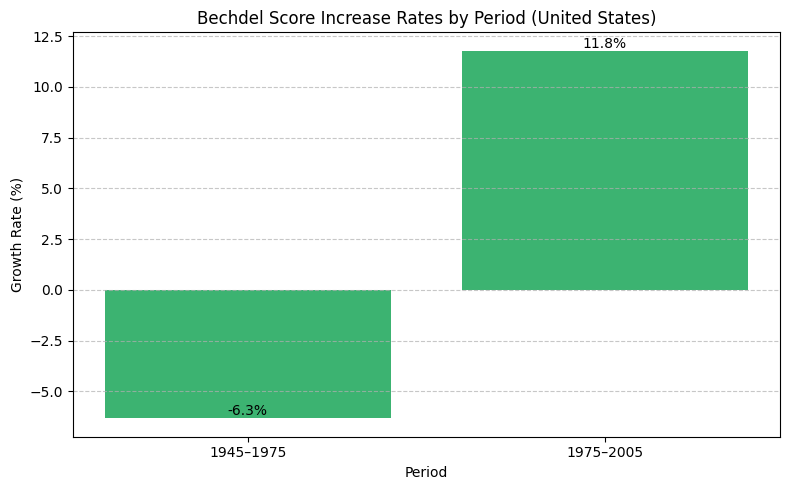

In [14]:
# Artış oranı hesaplayan fonksiyon
def compute_increase_ratio(df, start_year, end_year):
    period_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    early_avg = period_df[period_df['year'] <= start_year + 5]['bt_score'].mean()
    late_avg = period_df[period_df['year'] >= end_year - 5]['bt_score'].mean()
    if early_avg > 0:
        ratio = (late_avg - early_avg) / early_avg
    else:
        ratio = float('nan')
    return ratio * 100  # Yüzde olarak dön

# Dönemler ve artış oranları
periods = ['1915–1945', '1945–1975', '1975–2005']
ratios = [
    compute_increase_ratio(df_us, 1915, 1945),
    compute_increase_ratio(df_us, 1945, 1975),
    compute_increase_ratio(df_us, 1975, 2005)
]

# 🔍 Grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(periods, ratios, color='mediumseagreen')
plt.title("Bechdel Score Increase Rates by Period (United States)")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Period")

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Yüzde etiketlerini çubuk üstüne yaz
for bar, ratio in zip(bars, ratios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

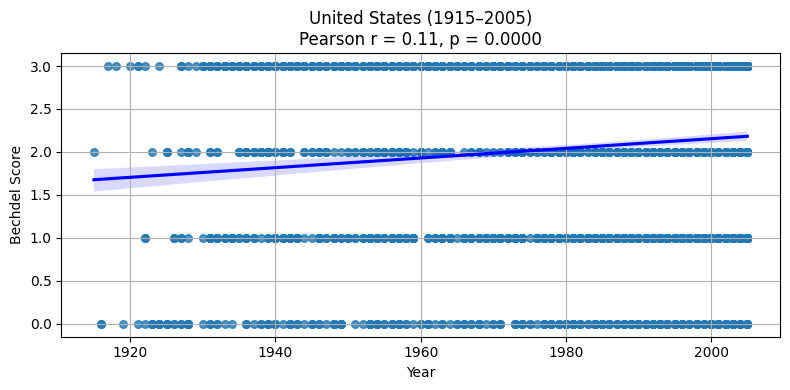

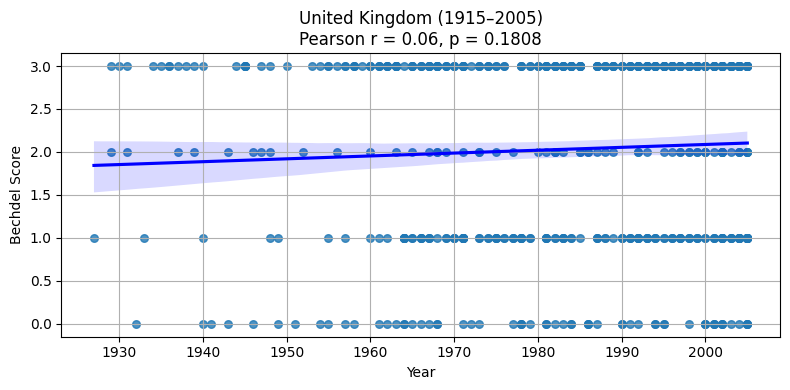

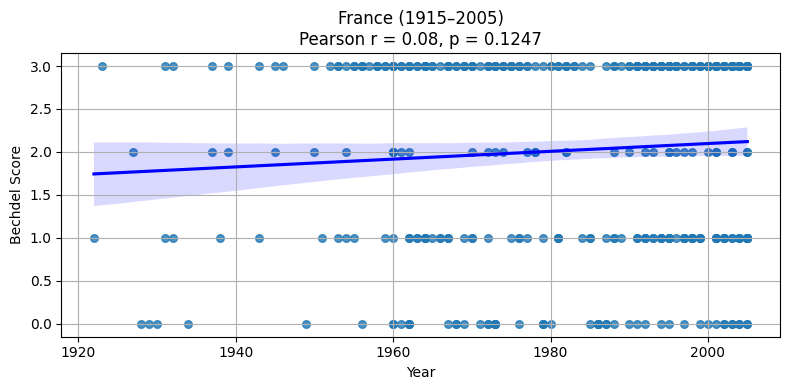

In [18]:
countries = ['United States', 'United Kingdom', 'France']
start_year, end_year = 1915, 2005

for country in countries:
    df_country = df_clean[
        (df_clean['year'] >= start_year) &
        (df_clean['year'] <= end_year) &
        (df_clean['production_countries'].astype(str).str.contains(country))
    ]

    if len(df_country) >= 2:
        # Korelasyon hesapla
        corr, p_val = pearsonr(df_country['year'], df_country['bt_score'])

        # Grafik çiz
        plt.figure(figsize=(8, 4))
        sns.regplot(x='year', y='bt_score', data=df_country, scatter_kws={"s": 30}, line_kws={"color": "blue"})
        plt.title(f"{country} (1915–2005)\nPearson r = {corr:.2f}, p = {p_val:.4f}")
        plt.xlabel("Year")
        plt.ylabel("Bechdel Score")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for: {country}")

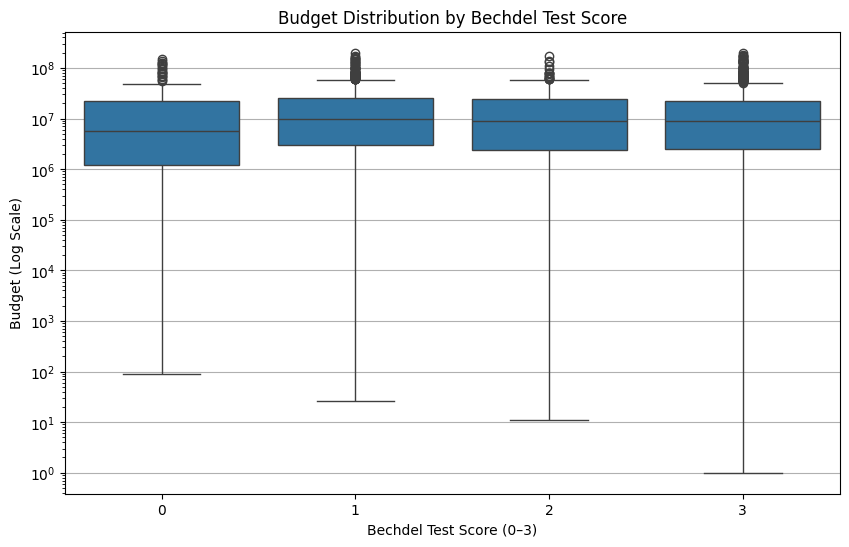

In [20]:

# Budget'ı sayıya çevir
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# NaN veya sıfır olanları çıkar
df_clean = df[['budget', 'bt_score']].dropna()
df_clean = df_clean[df_clean['budget'] > 0]


plt.figure(figsize=(10, 6))
sns.boxplot(x='bt_score', y='budget', data=df_clean)
plt.yscale('log')
plt.title('Budget Distribution by Bechdel Test Score')
plt.xlabel('Bechdel Test Score (0–3)')
plt.ylabel('Budget (Log Scale)')
plt.grid(True, axis='y')
plt.show()


<ipython-input-25-37d8b6fc59bf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_bt_score.values[:15], y=genre_bt_score.index[:15], palette='viridis')


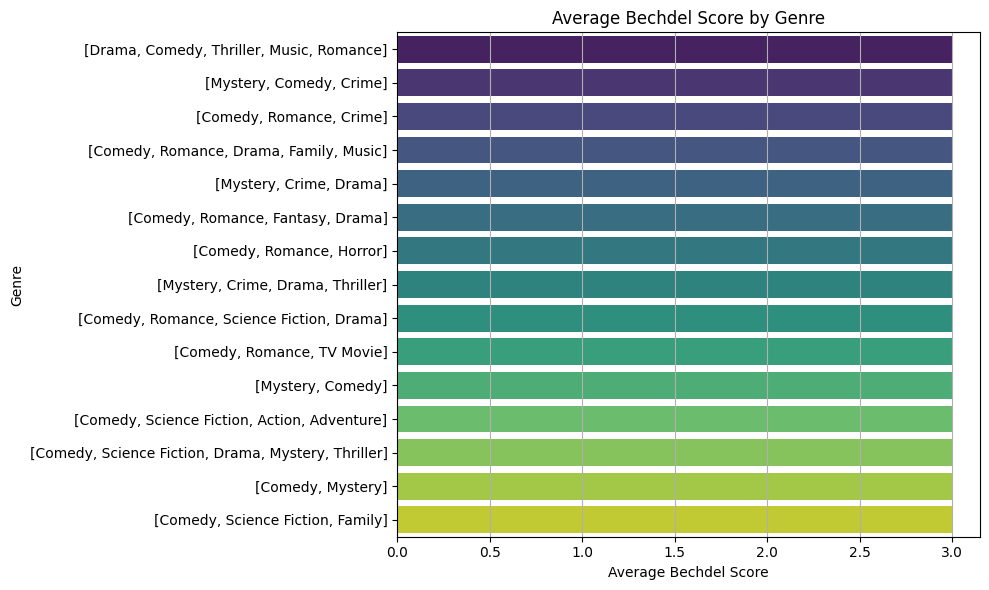

In [25]:
df_exploded = df.explode('genres')

df_exploded = df_exploded[['bt_score', 'genres']].dropna()
df_exploded = df_exploded[df_exploded['bt_score'].isin([0, 1, 2, 3])]

# Ortalama bt_score'u her tür için hesapla
genre_bt_score = df_exploded.groupby('genres')['bt_score'].mean().sort_values(ascending=False)

# İlk 15 türü görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_bt_score.values[:15], y=genre_bt_score.index[:15], palette='viridis')
plt.xlabel("Average Bechdel Score")
plt.ylabel("Genre")
plt.title("Average Bechdel Score by Genre")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

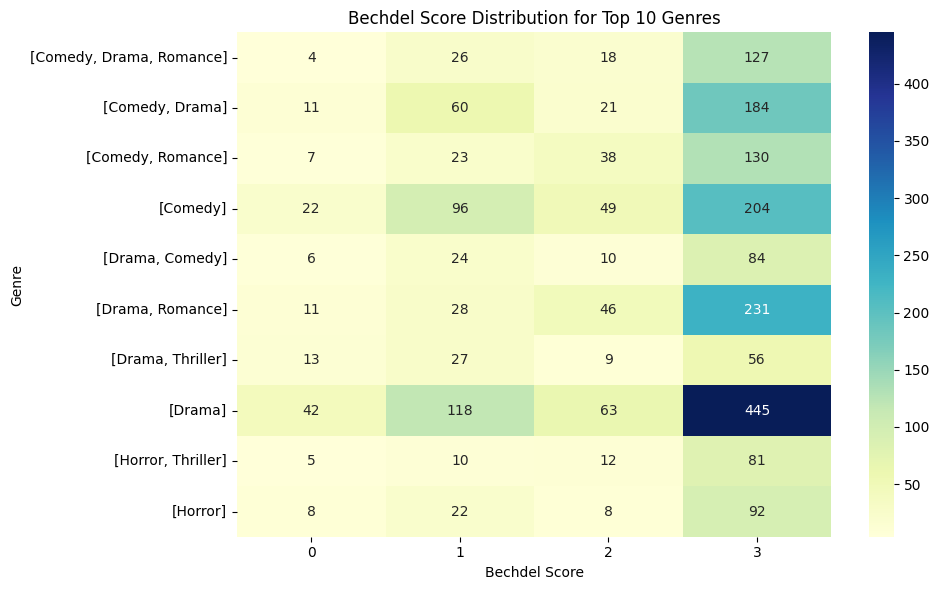

In [27]:
top_10_genres = df_exploded['genres'].value_counts().head(10).index

# 2. Sadece bu türlerdeki filmleri filtrele
df_top10 = df_exploded[df_exploded['genres'].isin(top_10_genres)]

# 3. Crosstab: tür × Bechdel skoru
genre_bt_crosstab = pd.crosstab(df_top10['genres'], df_top10['bt_score'])

# 4. Heatmap çiz
plt.figure(figsize=(10, 6))
sns.heatmap(genre_bt_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Bechdel Score Distribution for Top 10 Genres")
plt.xlabel("Bechdel Score")
plt.ylabel("Genre")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()